In [16]:
%pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [19]:
# Adjust target labels
y = y - 1  # Chuyển đổi các nhãn lớp từ [1, 2] thành [0, 1]

In [20]:
# Encoding categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


/var/folders/1q/ncwkwr814hvcmkdzs5qf08740000gn/T/ipykernel_96397/352067227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col])
/var/folders/1q/ncwkwr814hvcmkdzs5qf08740000gn/T/ipykernel_96397/352067227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col])
/var/folders/1q/ncwkwr814hvcmkdzs5qf08740000gn/T/ipykernel_96397/352067227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

## EDA

In [21]:
# Inspect data
print(X.head())
print(X.info())
print(X.describe())
print(y.value_counts())  # Kiểm tra sự mất cân bằng dữ liệu

   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           6           4           4        1169           4   
1           1          48           2           4        5951           0   
2           3          12           4           7        2096           0   
3           0          42           2           3        7882           0   
4           0          24           3           0        4870           0   

   Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  Attribute12  \
0           4           4           2            0            4            0   
1           2           2           1            0            2            0   
2           3           2           2            0            3            0   
3           3           2           2            2            4            1   
4           2           3           2            0            4            3   

   Attribute13  Attribute14  Attribute15  Attribute16  A

In [22]:
# Check missing values
print(X.isnull().sum())

# If missing, apply imputation
X.fillna(X.mean(), inplace=True)


Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
dtype: int64


/var/folders/1q/ncwkwr814hvcmkdzs5qf08740000gn/T/ipykernel_96397/823065225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [48]:

# Chuyển đổi dữ liệu huấn luyện và kiểm tra thành DataFrame để dễ in và kiểm tra
X_train_df = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X_test.shape[1])])
y_train_df = pd.DataFrame(y_train, columns=["Target"])
y_test_df = pd.DataFrame(y_test, columns=["Target"])

# Hiển thị mẫu dữ liệu từ mỗi tập
X_train_sample = X_train_df.head(5)
y_train_sample = y_train_df.head(5)
X_test_sample = X_test_df.head(5)
y_test_sample = y_test_df.head(5)

X_train_sample, y_train_sample, X_test_sample, y_test_sample


(   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
 0  -1.254566   1.252574  -0.503428  -0.831650   1.794810   1.833169   
 1   1.132053  -0.738668  -0.503428   0.264068  -0.874503  -0.699707   
 2  -1.254566   1.252574   1.344014  -0.101171   0.744240  -0.699707   
 3  -0.459026   1.252574  -1.427149   0.629307   0.254753   1.833169   
 4  -0.459026   2.248194  -0.503428  -1.196889   1.848685   1.833169   
 
    Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
 0   1.338078   0.024147   0.449326  -0.303686    1.046987    1.564281   
 1   1.338078   0.918477   0.449326  -0.303686    1.046987    0.611613   
 2  -0.317959   0.024147   0.449326   3.885083   -0.765977   -0.341055   
 3  -1.145978   0.024147  -0.963650  -0.303686   -0.765977    1.564281   
 4   0.510060  -1.764514  -0.963650  -0.303686   -0.765977    0.611613   
 
    Feature_12  Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  \
 0    1.007407    0.460831    2.016956   -

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, lr_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       140
           1       0.63      0.53      0.58        60

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



/Users/chauthanhuy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Results:")
print(classification_report(y_test, xgb_pred))

XGBoost Results:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       140
           1       0.62      0.50      0.56        60

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



In [27]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("Support Vector Machine Results:")
print(classification_report(y_test, svc_pred))

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       140
           1       0.64      0.45      0.53        60

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.76      0.75       200



/Users/chauthanhuy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, rf_pred))

/Users/chauthanhuy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Results:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       140
           1       0.69      0.42      0.52        60

    accuracy                           0.77       200
   macro avg       0.74      0.67      0.68       200
weighted avg       0.76      0.77      0.75       200



In [29]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print("Neural Network Results:")
print(classification_report(y_test, nn_pred))


/Users/chauthanhuy/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Results:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       140
           1       0.53      0.55      0.54        60

    accuracy                           0.72       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.72      0.72      0.72       200



/Users/chauthanhuy/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
# Convert to numpy arrays if needed
preds = np.array(preds)
y_test = np.array(y_test)


In [33]:
models = {
    'Logistic Regression': lr_pred,
    'XGBoost': xgb_pred,
    'SVM': svc_pred,
    'Random Forest': rf_pred,
    'Neural Network': nn_pred
}

for model_name, preds in models.items():
    print(f"{model_name}:")
    print(f"Accuracy: {np.mean(preds == y_test):.4f}")
    print(f"F1-Score: {f1_score(y_test, preds, average='weighted'):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, preds):.4f}")
    print("-" * 30)


Logistic Regression:
Accuracy: 0.5980
F1-Score: 0.7591
ROC-AUC: 0.6988
------------------------------
XGBoost:
Accuracy: 0.6040
F1-Score: 0.7516
ROC-AUC: 0.6857
------------------------------
SVM:
Accuracy: 0.6160
F1-Score: 0.7461
ROC-AUC: 0.6714
------------------------------
Random Forest:
Accuracy: 0.6280
F1-Score: 0.7503
ROC-AUC: 0.6690
------------------------------
Neural Network:
Accuracy: 0.5760
F1-Score: 0.7213
ROC-AUC: 0.6714
------------------------------


In [34]:
import pandas as pd

# Collect metrics
results = []
for model_name, preds in models.items():
    accuracy = np.mean(preds == y_test)
    f1 = f1_score(y_test, preds, average='weighted')
    roc_auc = roc_auc_score(y_test, preds)
    results.append({'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'ROC-AUC': roc_auc})

# Create a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1-Score   ROC-AUC
0  Logistic Regression     0.598  0.759132  0.698810
1              XGBoost     0.604  0.751598  0.685714
2                  SVM     0.616  0.746072  0.671429
3        Random Forest     0.628  0.750329  0.669048
4       Neural Network     0.576  0.721288  0.671429


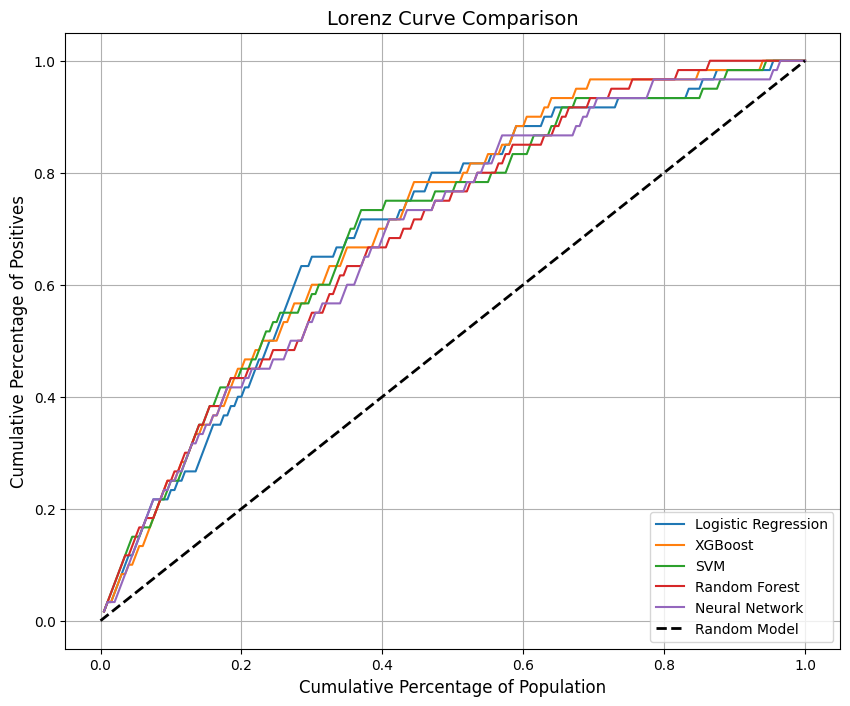

In [45]:
def plot_lorenz_curve(y_true, y_pred_prob, model_name):
    # Chuyển đổi về mảng 1 chiều
    y_true = np.array(y_true).ravel()
    y_pred_prob = np.array(y_pred_prob).ravel()
    
    # Tạo DataFrame từ giá trị thực và dự đoán
    data = pd.DataFrame({'Actual': y_true, 'Predicted Prob': y_pred_prob})
    
    # Sắp xếp theo xác suất dự đoán giảm dần
    data = data.sort_values(by='Predicted Prob', ascending=False)
    
    # Tính tích lũy của giá trị thực (lớp "Bad")
    data['Cumulative Actual'] = data['Actual'].cumsum() / data['Actual'].sum()
    
    # Tính tích lũy của tổng số mẫu
    data['Cumulative Total'] = np.arange(1, len(data) + 1) / len(data)
    
    return data['Cumulative Total'], data['Cumulative Actual']

# Vẽ Lorenz cho tất cả các mô hình
plt.figure(figsize=(10, 8))

for model_name, model in zip(models.keys(), [lr_model, xgb_model, svc_model, rf_model, nn_model]):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  # For SVM
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Chuẩn hóa về [0, 1]
    else:
        continue  # Skip if probability is not available
    
    cumulative_total, cumulative_actual = plot_lorenz_curve(y_test, y_proba, model_name)
    plt.plot(cumulative_total, cumulative_actual, label=model_name)

# Đường tham chiếu ngẫu nhiên
plt.plot([0, 1], [0, 1], 'k--', label='Random Model', lw=2)

# Cài đặt đồ thị
plt.title('Lorenz Curve Comparison', fontsize=14)
plt.xlabel('Cumulative Percentage of Population', fontsize=12)
plt.ylabel('Cumulative Percentage of Positives', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.show()


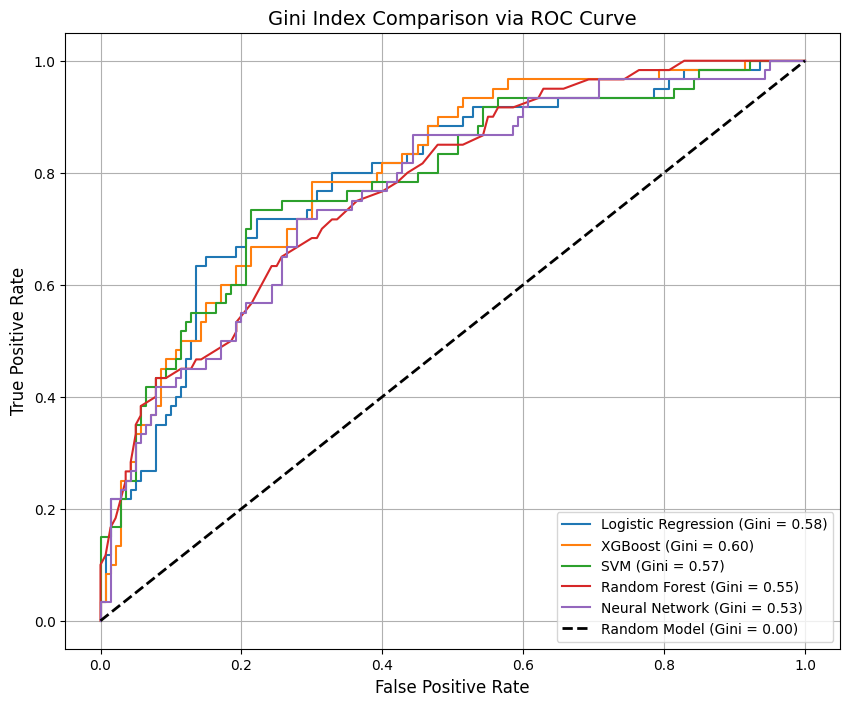

In [47]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for model_name, model in zip(models.keys(), [lr_model, xgb_model, svc_model, rf_model, nn_model]):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  # For SVM
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Chuẩn hóa về [0, 1]
    else:
        continue  # Skip if probability is not available

    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    gini = 2 * roc_auc - 1
    plt.plot(fpr, tpr, label=f'{model_name} (Gini = {gini:.2f})')

# Đường tham chiếu ngẫu nhiên
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Model (Gini = 0.00)')

# Cài đặt đồ thị
plt.title('Gini Index Comparison via ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.show()


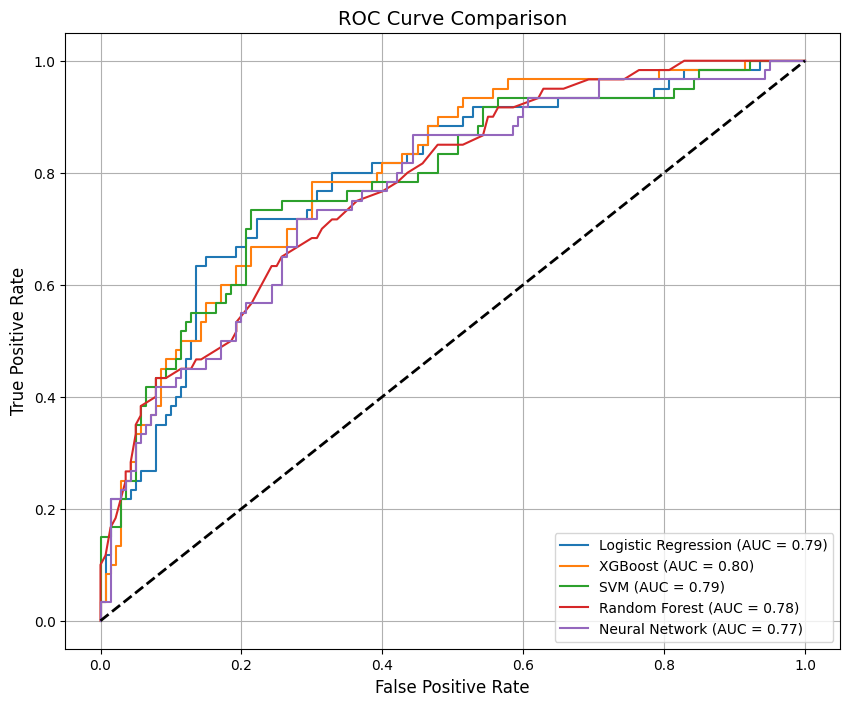

In [36]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for model_name, model in zip(models.keys(), [lr_model, xgb_model, svc_model, rf_model, nn_model]):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  # For SVM
        y_proba = model.decision_function(X_test)
    else:
        continue  # Skip if probability is not available

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve Comparison', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.show()
